<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


1번 합성곱 층

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

2번 합성곱 층

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

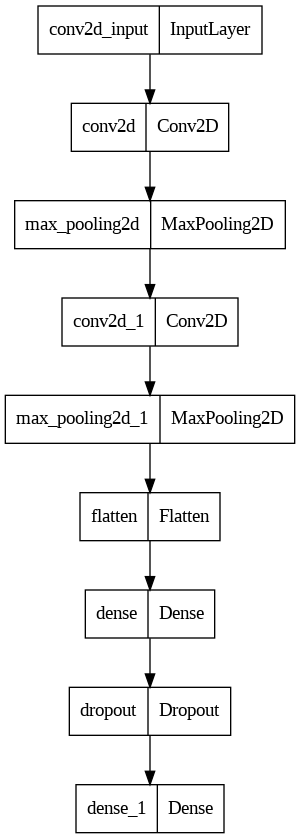

In [ ]:
keras.utils.plot_model(model)

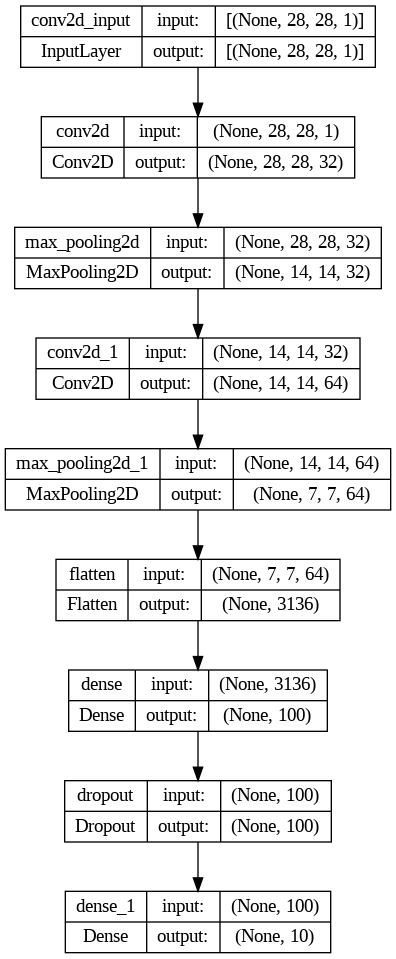

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 65s 42ms/step - loss: 0.5520 - accuracy: 0.7980 - val_loss: 0.3567 - val_accuracy: 0.8733
Epoch 2/20
   1/1500 [..............................] - ETA: 1:09 - loss: 0.5023 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 63s 42ms/step - loss: 0.3766 - accuracy: 0.8639 - val_loss: 0.2955 - val_accuracy: 0.8912
Epoch 3/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3250 - accuracy: 0.8830 - val_loss: 0.2615 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2896 - accuracy: 0.8945 - val_loss: 0.2529 - val_accuracy: 0.9058
Epoch 5/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2657 - accuracy: 0.9039 - val_loss: 0.2421 - val_accuracy: 0.9103
Epoch 6/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2433 - accuracy: 0.9122 - val_loss: 0.2315 - val_accuracy: 0.9136
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2245 - accuracy: 0.9180 - val_loss: 0.2282 - val_accuracy: 0.9174
Epoch 8/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2082 - accuracy: 0.9234 - val_loss: 0.2318 - val_accura

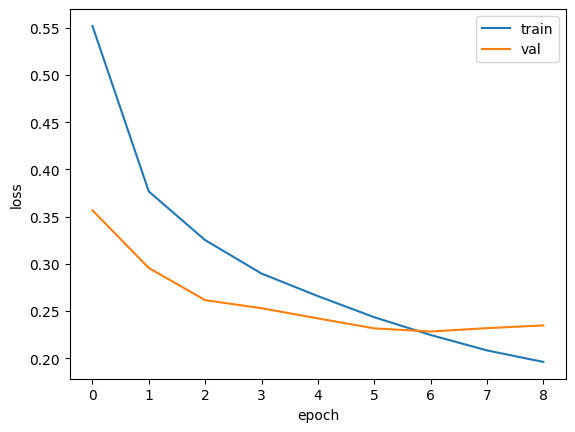

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2282 - accuracy: 0.9174


[0.22819291055202484, 0.9174166917800903]

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 318ms/step
[[3.6649591e-14 1.6662047e-21 4.8594226e-18 4.3435985e-17 2.6143553e-15
  2.8503827e-18 1.1485154e-14 2.8824894e-16 1.0000000e+00 1.4586801e-17]]


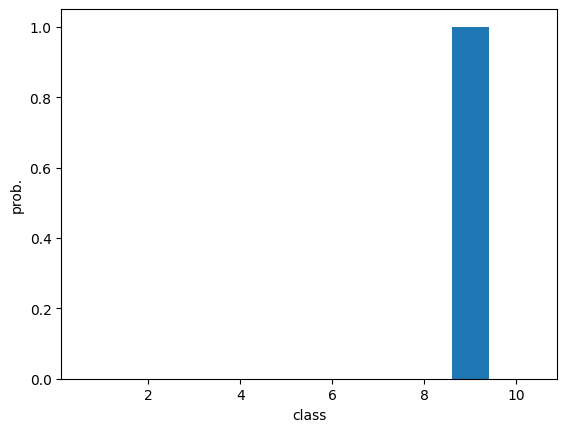

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 18ms/step - loss: 0.2496 - accuracy: 0.9104


[0.24958376586437225, 0.9103999733924866]

**++++++++++합성곱 신경망 시각화+++++++++++**

In [21]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [22]:
model.layers

In [23]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)    # 가중치, 절편

(3, 3, 1, 32) (32,)


In [25]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.022041403 0.25631714


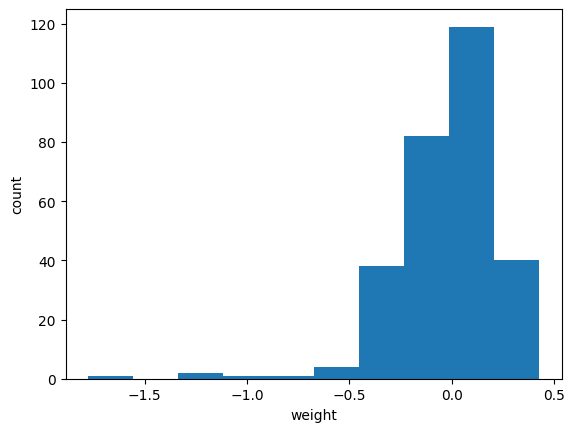

In [26]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

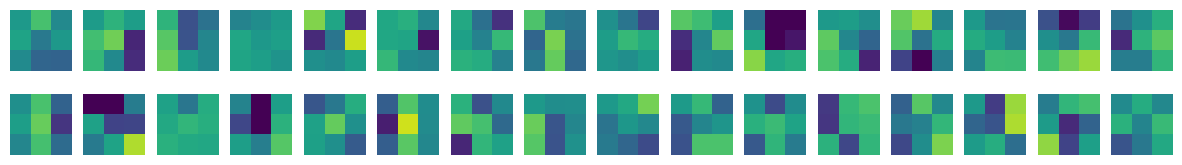

In [34]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [35]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [36]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [37]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.008100625 0.08637297


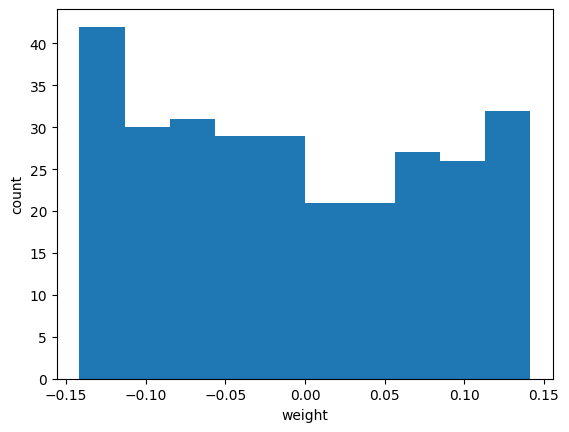

In [38]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

학습 없이 가중치를 확인해보면 결과가 고른 분포를 보임

-> 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기때문

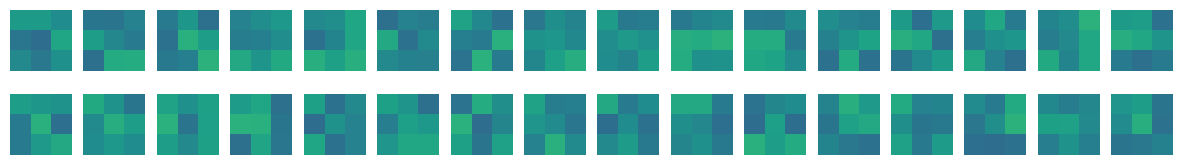

In [40]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

**함수형 API**

Sequential 클래스는 층을 차례대로 쌓은 모델을 만듦 -> 복잡한 모델에서 부적합

다중 입력이나 다중 출력에 대한 모델 생성

In [41]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [42]:
conv_acti = keras.Model(model.input, model.layers[0].output)

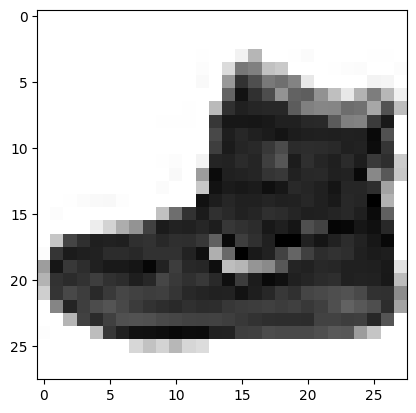

In [43]:
(train_input, train_target), (teset_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [44]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 66ms/step


In [45]:
print(feature_maps.shape)

(1, 28, 28, 32)


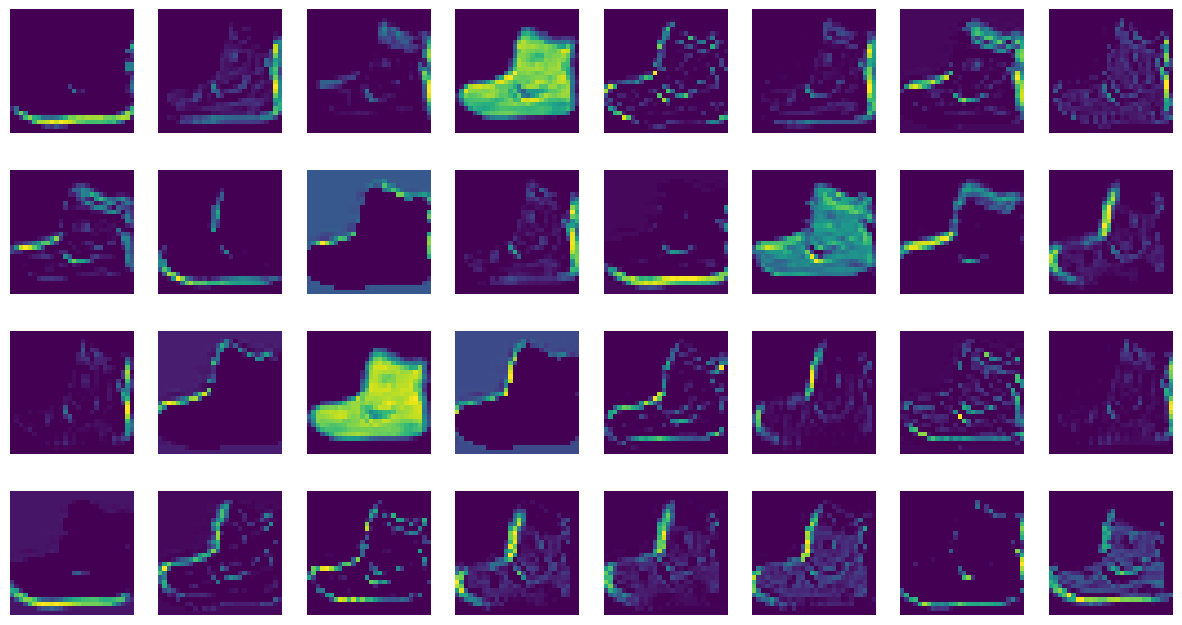

In [47]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [48]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [49]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 168ms/step


In [50]:
print(feature_maps.shape)

(1, 14, 14, 64)


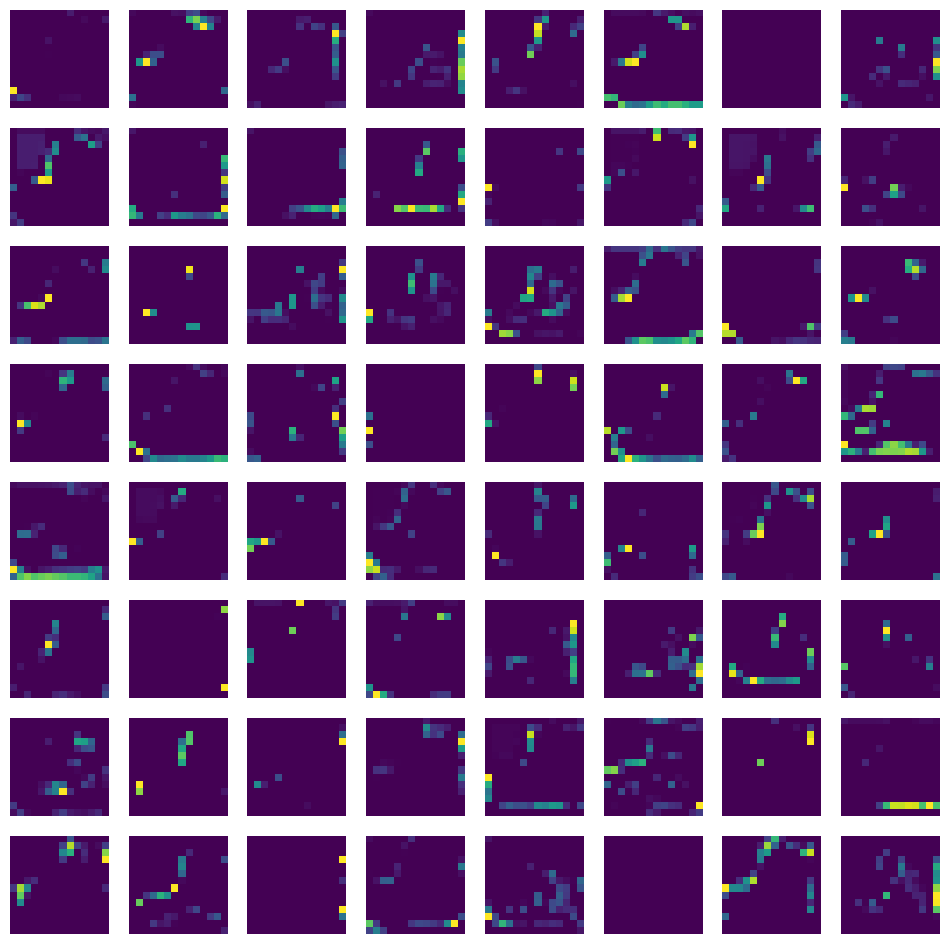

In [51]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지

뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보 학습